# Analysis of the behavioral data of a virtual city free walk
This behavioral data contains the player's saved positions and rotations during the virtual city walk for both head and eye movements. Additionally, the "HON" variable contains the kind of object the player looked at.

## 1. Load data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BehavioralData/Behavior_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv')

df.head(50)

,Unnamed: 0,valid,leftBlink,rightBlink,ETWTime,ETWoriginX,ETWoriginY,ETWoriginZ,ETWdirectionX,ETWdirectionY,...,ETLoriginZ,ETLdirectionX,ETLdirectionY,ETLdirectionZ,HToriginX,HToriginY,HToriginZ,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.000,1.0,0.0,0.0,58.655426,13.412971,12.306775,21.046938,0.942591,0.099437,...,-0.026742,0.086533,0.113068,0.989807,13.420355,12.303403,21.029396,0.969479,-0.037709,-0.242255
1,0.018,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
2,0.021,1.0,0.0,0.0,58.666626,13.412885,12.306769,21.046755,0.942547,0.099320,...,-0.026736,0.086563,0.112869,0.989822,547.551270,2.045723,589.369324,0.969452,-0.037648,-0.242376
3,0.103,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
4,0.105,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
5,0.106,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
6,0.107,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
7,0.108,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
8,0.109,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171
9,0.110,1.0,0.0,0.0,58.685047,547.543760,2.049087,589.386500,0.942298,0.102535,...,-0.026730,0.086624,0.115112,0.989563,547.551208,2.045722,589.369141,0.969250,-0.037722,-0.243171


In [27]:
df.columns

Index(['Unnamed: 0', 'valid', 'leftBlink', 'rightBlink', 'ETWTime',
       'ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ', 'HON', 'ETLoriginX', 'ETLoriginY',
       'ETLoriginZ', 'ETLdirectionX', 'ETLdirectionY', 'ETLdirectionZ',
       'HToriginX', 'HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY',
       'HTdirectionZ'],
      dtype='object')

### Preprocessing
When looking into the file, we found its dimensions are 163661 x 24, and it contains missing values which we should fix or delete.

In [30]:
# File contains 163661 x 24
df.info()
# Check for NaN
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163661 entries, 0 to 163660
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163661 non-null  float64
 1   valid          163661 non-null  float64
 2   leftBlink      163661 non-null  float64
 3   rightBlink     163661 non-null  float64
 4   ETWTime        163661 non-null  float64
 5   ETWoriginX     163661 non-null  float64
 6   ETWoriginY     163661 non-null  float64
 7   ETWoriginZ     163661 non-null  float64
 8   ETWdirectionX  163661 non-null  float64
 9   ETWdirectionY  163661 non-null  float64
 10  ETWdirectionZ  163661 non-null  float64
 11  HON            163470 non-null  object 
 12  ETLoriginX     163442 non-null  float64
 13  ETLoriginY     163442 non-null  float64
 14  ETLoriginZ     163442 non-null  float64
 15  ETLdirectionX  163442 non-null  float64
 16  ETLdirectionY  163442 non-null  float64
 17  ETLdirectionZ  163442 non-nul

Unnamed: 0         0
valid              0
leftBlink          0
rightBlink         0
ETWTime            0
ETWoriginX         0
ETWoriginY         0
ETWoriginZ         0
ETWdirectionX      0
ETWdirectionY      0
ETWdirectionZ      0
HON              191
ETLoriginX       219
ETLoriginY       219
ETLoriginZ       219
ETLdirectionX    219
ETLdirectionY    219
ETLdirectionZ    219
HToriginX        229
HToriginY        229
HToriginZ        229
HTdirectionX     229
HTdirectionY     229
HTdirectionZ     229
dtype: int64

After fixing preprocessing, the file length is 163432 x 24

In [37]:
# Delete NaN values and reset index
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()
# df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163432 entries, 0 to 163431
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163432 non-null  float64
 1   valid          163432 non-null  float64
 2   leftBlink      163432 non-null  float64
 3   rightBlink     163432 non-null  float64
 4   ETWTime        163432 non-null  float64
 5   ETWoriginX     163432 non-null  float64
 6   ETWoriginY     163432 non-null  float64
 7   ETWoriginZ     163432 non-null  float64
 8   ETWdirectionX  163432 non-null  float64
 9   ETWdirectionY  163432 non-null  float64
 10  ETWdirectionZ  163432 non-null  float64
 11  HON            163432 non-null  object 
 12  ETLoriginX     163432 non-null  float64
 13  ETLoriginY     163432 non-null  float64
 14  ETLoriginZ     163432 non-null  float64
 15  ETLdirectionX  163432 non-null  float64
 16  ETLdirectionY  163432 non-null  float64
 17  ETLdirectionZ  163432 non-nul

### 2. Eye vs head tracking data

In [80]:
head_origin = df_clean[['HToriginX', 'HToriginY', 'HToriginZ']]
player_direction = df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]


# head_origin
# Save to CSV
# player_origin2.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/positionsTestFull.csv', index=False)

,HToriginX,HToriginY,HToriginZ
0,13.420355,12.303403,21.029396
1,547.551270,2.045723,589.369324
2,547.551270,2.045723,589.369324
3,547.551208,2.045722,589.369141
4,547.551208,2.045722,589.369141
...,...,...,...
163427,527.346741,2.038607,593.383911
163428,527.346741,2.038620,593.384033
163429,527.346741,2.038561,593.384155
163430,527.346741,2.038495,593.384338


This exploratory analysis allows to see the range of the positions for the player during the virtual walk which is as expected. Namely, positions on the y-axis stay around zero (player  is sitting on a chair, then positions are stable), x and y axis values range between 500 to 650 approx, which also seems correct (this correspond to the limits of the area in the city where participants were instructed to do the walk.


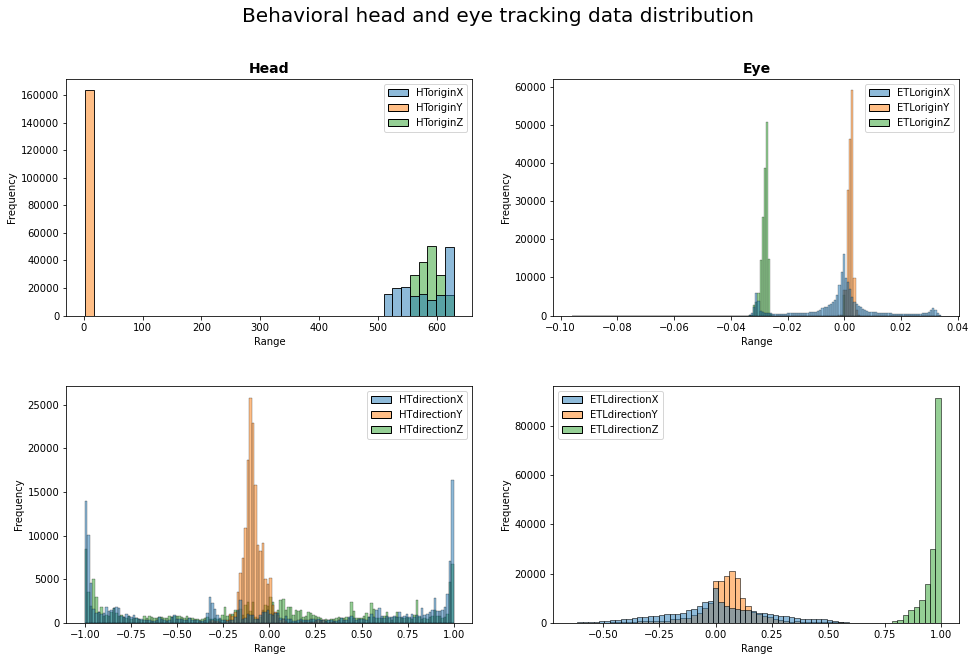

In [215]:
fig, ax = plt.subplots(2,2, figsize=(16, 10))

# head-tracking distribution
fig.suptitle("Behavioral head and eye tracking data distribution", fontsize=20)
sns.histplot(df_clean[['HToriginX', 'HToriginY', 'HToriginZ']], ax=ax[0,0])
ax[0,0].set_xlabel('Range')
ax[0,0].set_ylabel('Frequency')

sns.histplot(df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']], ax=ax[1,0])
ax[1,0].set_xlabel('Range')
ax[1,0].set_ylabel('Frequency')

# eye-tracking distribution
sns.histplot(df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]], ax=ax[0,1])
ax[0,1].set_xlabel('Range')
ax[0,1].set_ylabel('Frequency')

sns.histplot(df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]], ax=ax[1,1])
ax[1,1].set_xlabel('Range')
ax[1,1].set_ylabel('Frequency')

col_title = ['Head', 'Eye']
for i, ax in enumerate(ax.flatten()[:2]):
    ax.set_title(col_title[i], fontweight='bold', fontsize=14)
    i += 1

fig.subplots_adjust(hspace=0.3)
# Save visualization
# plt.savefig('Images/behavioral_distribution.eps', format='eps', dpi=1200)

In [59]:
player_direction = df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]

player_direction.head()

,HTdirectionX,HTdirectionY,HTdirectionZ
0,0.969479,-0.037709,-0.242255
1,0.969452,-0.037648,-0.242376
2,0.969452,-0.037648,-0.242376
3,0.969250,-0.037722,-0.243171
4,0.969250,-0.037722,-0.243171


<AxesSubplot:ylabel='Frequency'>

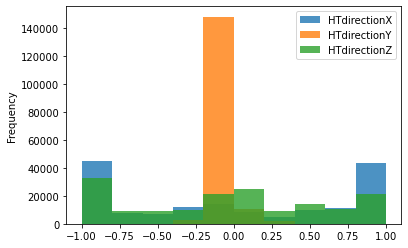

In [60]:
player_direction.plot(kind='hist', alpha=0.8)
# player_direction2.to_csv('/Users/johnmadrid/Google Drive/Osnabrück/WS 2021/NeuroBioPsuchology_2021/Thesis/Players_positions_directions/directionsTestFull.csv', index=False)


<AxesSubplot:>

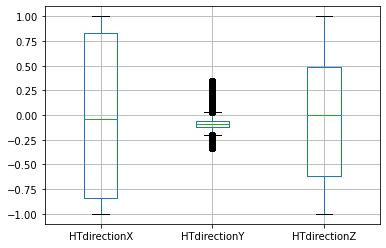

In [39]:
player_direction.boxplot()

In [52]:
eyes_local_origin = df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]]

eyes_local_origin

,ETLoriginX,ETLoriginY,ETLoriginZ
0,-0.000092,0.002522,-0.026742
1,0.000083,0.002523,-0.026736
2,0.000083,0.002523,-0.026736
3,0.000257,0.002521,-0.026730
4,0.000257,0.002521,-0.026730
...,...,...,...
163427,-0.031765,-0.000271,-0.030184
163428,-0.031782,-0.000256,-0.030173
163429,-0.031544,-0.000074,-0.030771
163430,-0.031239,-0.000459,-0.029431


<AxesSubplot:ylabel='Frequency'>

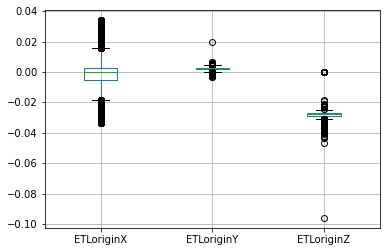

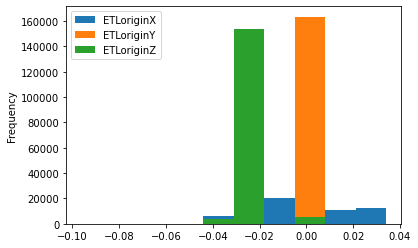

In [53]:
eyes_local_origin.boxplot()

eyes_local_origin.plot.hist()


In [54]:
eyes_local_direction = df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]]

eyes_local_direction.head(50)

,ETLdirectionX,ETLdirectionY,ETLdirectionZ
0,0.086533,0.113068,0.989807
1,0.086563,0.112869,0.989822
2,0.086563,0.112869,0.989822
3,0.086624,0.115112,0.989563
4,0.086624,0.115112,0.989563
5,0.086624,0.115112,0.989563
6,0.086624,0.115112,0.989563
7,0.086624,0.115112,0.989563
8,0.086624,0.115112,0.989563
9,0.086624,0.115112,0.989563


<AxesSubplot:ylabel='Frequency'>

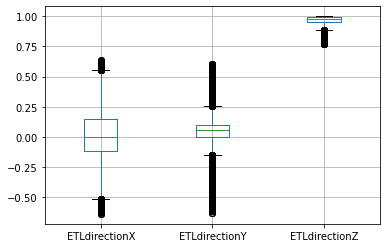

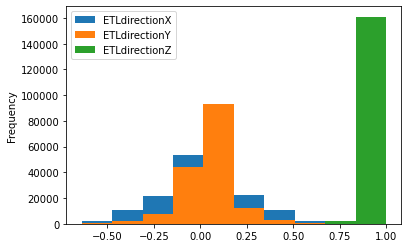

In [57]:
eyes_local_direction.boxplot()
eyes_local_direction.plot.hist()

In [68]:
eyes_world_direction = df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]]

eyes_world_direction.head()

,ETWdirectionX,ETWdirectionY,ETWdirectionZ
0,0.942591,0.099437,-0.325585
1,0.942547,0.099320,-0.325718
2,0.942547,0.099320,-0.325718
3,0.942298,0.102535,-0.325898
4,0.942298,0.102535,-0.325898


<AxesSubplot:ylabel='Frequency'>

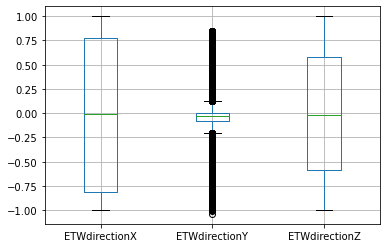

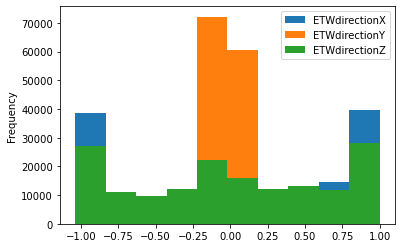

In [66]:
eyes_world_direction.boxplot()

eyes_world_direction.plot.hist()

Explore for HTorigin values bigger than initial 547.551270 in player_direction

In [64]:
# player_origin.loc[player_origin['HToriginX'] > 625.551270, ['HToriginX']]
#
# player_origin.describe()